In [1]:
from util import ReadDatabase

In [2]:
#Dataset directory for training
DIR="dataset\sim2"
width=height=64
X, y=ReadDatabase(DIR,width,height)

In [3]:
#Train and Test distribution
from keras.utils import to_categorical
y=to_categorical(y)
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y=train_test_split(X, y, test_size=0.3, random_state=13)

Using TensorFlow backend.


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from models import AttentionResNetNanoMotion
# define generators for training and validation data
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
train_datagen.fit(train_x)
val_datagen.fit(val_x)

In [5]:
import keras
from keras.callbacks import ModelCheckpoint
# build a model
model = AttentionResNetNanoMotion(n_classes=5,dropout=0.2)
# prepare usefull callbacks
lr_reducer = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=7, min_lr=10e-7, epsilon=0.01, verbose=1)
early_stopper = EarlyStopping(monitor='val_acc', min_delta=0, patience=15, verbose=1)
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)
callbacks= [lr_reducer, early_stopper, checkpointer]
# define loss, metrics, optimizer
model.compile(keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

D:\Anaconda3\envs\nanoscopy\lib\site-packages\keras\callbacks.py:928: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.
  warnings.warn('`epsilon` argument is deprecated and '


In [106]:
# fits the model on batches with real-time data augmentation
batch_size = 16

history=model.fit_generator(train_datagen.flow(train_x, train_y, batch_size=batch_size),
                    steps_per_epoch=len(train_x)//batch_size, epochs=200,
                    validation_data=val_datagen.flow(val_x, val_y, batch_size=batch_size), 
                    validation_steps=len(val_x)//batch_size,
                    callbacks=callbacks, initial_epoch=0)

Epoch 1/200
474/474 [==============================] - 107s 226ms/step - loss: 2.2712 - acc: 0.6475 - val_loss: 0.8998 - val_acc: 0.7722

Epoch 00001: val_acc improved from -inf to 0.77217, saving model to best_weights.hdf5
Epoch 2/200
474/474 [==============================] - 74s 157ms/step - loss: 0.8830 - acc: 0.7234 - val_loss: 0.8248 - val_acc: 0.7688

Epoch 00002: val_acc did not improve from 0.77217
Epoch 3/200
474/474 [==============================] - 74s 157ms/step - loss: 0.7631 - acc: 0.7491 - val_loss: 0.4460 - val_acc: 0.8395

Epoch 00003: val_acc improved from 0.77217 to 0.83951, saving model to best_weights.hdf5
Epoch 4/200
474/474 [==============================] - 74s 157ms/step - loss: 0.7067 - acc: 0.7571 - val_loss: 0.5487 - val_acc: 0.8318

Epoch 00004: val_acc did not improve from 0.83951
Epoch 5/200
474/474 [==============================] - 75s 158ms/step - loss: 0.6769 - acc: 0.7739 - val_loss: 0.5750 - val_acc: 0.8241

Epoch 00005: val_acc did not improve fr

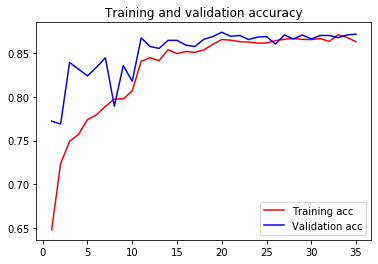

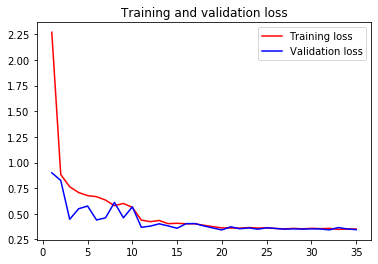

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()